In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'Analytics Case Study Dataset - Bazaar Launchpad 2023.csv')

#### HOW DATA LOOKS LIKE

In [4]:
df.head()

,dispatch_date,order_date,city,town,uc,delivery_warehouse,delivered_by,store_id,shaheen_id,tour_number,...,item_discount,net_gmv,gross_nmv,adjustment_amount,ordered_quantity,delivered_quantity,returned_quantity,out_of_stock_quantity,adjustment_reason,simplified_return_reason
0,8/1/2022,7/30/2022,Peshawar,Mardan,MDN-04 (Sabzi Mandi),ISB1,BAZAAR_RIDER,7M1NQJBMHLBgojlLWOQ7ia,L25UDNtYbloECsTcdGdvD,11-22-212-0063,...,10,2860,0,0,2,0,2,0,NaN,Customer Issue
1,8/1/2022,7/31/2022,Peshawar,Mardan,MDN-04 (Sabzi Mandi),ISB1,BAZAAR_RIDER,7M1NQJBMHLBgojlLWOQ7ia,L25UDNtYbloECsTcdGdvD,11-22-212-0063,...,0,1764,1764,0,3,3,0,0,NaN,NaN
2,8/1/2022,7/31/2022,Peshawar,Mardan,MDN-04 (Sabzi Mandi),ISB1,BAZAAR_RIDER,7M1NQJBMHLBgojlLWOQ7ia,L25UDNtYbloECsTcdGdvD,11-22-212-0063,...,0,1368,1368,0,3,3,0,0,NaN,NaN
3,8/1/2022,7/30/2022,Peshawar,Mardan,MDN-04 (Sabzi Mandi),ISB1,BAZAAR_RIDER,7M1NQJBMHLBgojlLWOQ7ia,L25UDNtYbloECsTcdGdvD,11-22-212-0063,...,0,2352,0,0,4,0,4,0,NaN,Customer Issue
4,8/1/2022,7/29/2022,Peshawar,Mardan,MDN-04 (Sabzi Mandi),ISB1,BAZAAR_RIDER,7M1NQJBMHLBgojlLWOQ7ia,L25UDNtYbloECsTcdGdvD,11-22-212-0063,...,3,1136,1160,0,8,8,0,0,NaN,NaN


#### SOME INFO ABOUT THE CURRENT DATA

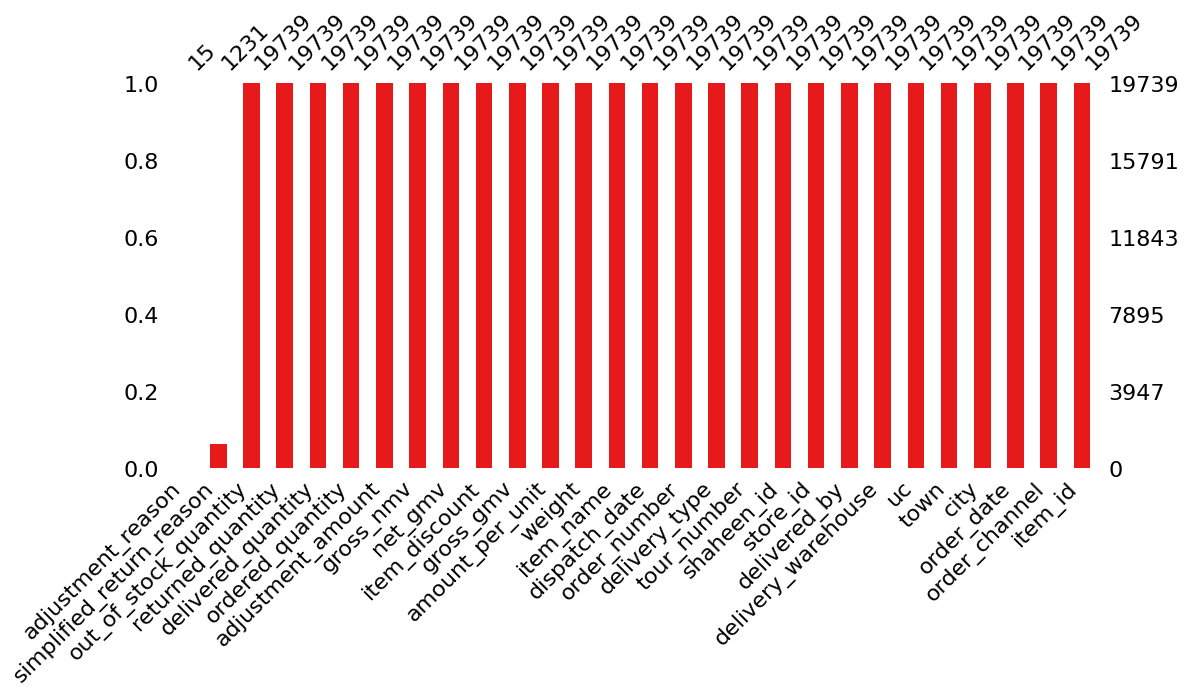

In [5]:
import missingno as msno

msno.bar(df, figsize=(12, 5), sort='ascending', color=(0.9, 0.1, 0.1))
plt.show()

In [6]:
df.describe()

,item_id,weight,amount_per_unit,gross_gmv,item_discount,net_gmv,gross_nmv,adjustment_amount,ordered_quantity,delivered_quantity,returned_quantity,out_of_stock_quantity
count,1.973900e+04,19739.000000,19739.000000,1.973900e+04,19739.000000,19739.000000,1.973900e+04,19739.000000,19739.000000,19739.000000,19739.000000,19739.000000
mean,4.109656e+17,2.619082,741.017427,1.601842e+03,0.815340,1594.106692,1.507530e+03,0.666346,3.250671,3.077664,0.171032,0.001976
std,3.179919e+17,4.290583,1274.711105,8.414398e+03,5.301192,7993.724741,8.158867e+03,28.740021,7.231791,7.067169,1.664398,0.105316
min,5.271640e+12,0.003000,19.000000,1.900000e+01,0.000000,19.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000
25%,9.316550e+16,0.220000,109.000000,2.120000e+02,0.000000,212.000000,1.690000e+02,0.000000,1.000000,1.000000,0.000000,0.000000
50%,3.798590e+17,0.375000,183.000000,5.700000e+02,0.000000,565.000000,5.070000e+02,0.000000,2.000000,2.000000,0.000000,0.000000
75%,6.845830e+17,4.800000,860.000000,1.710000e+03,0.000000,1710.000000,1.620000e+03,0.000000,3.000000,3.000000,0.000000,0.000000
max,9.999050e+17,50.000000,8920.000000,1.007500e+06,450.000000,937750.000000,1.007500e+06,2700.000000,455.000000,450.000000,100.000000,12.000000


In [7]:
df.drop(columns=['order_number', 'item_id'], inplace=True)

In [8]:
df.columns

Index(['dispatch_date', 'order_date', 'city', 'town', 'uc',
       'delivery_warehouse', 'delivered_by', 'store_id', 'shaheen_id',
       'tour_number', 'delivery_type', 'order_channel', 'item_name', 'weight',
       'amount_per_unit', 'gross_gmv', 'item_discount', 'net_gmv', 'gross_nmv',
       'adjustment_amount', 'ordered_quantity', 'delivered_quantity',
       'returned_quantity', 'out_of_stock_quantity', 'adjustment_reason',
       'simplified_return_reason'],
      dtype='object')

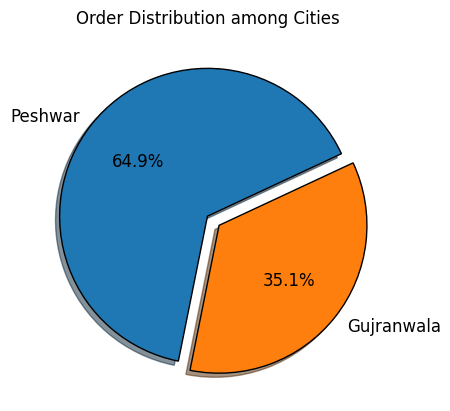

In [9]:
plt.pie(df['city'].value_counts(), labels=['Peshwar', 'Gujranwala'], autopct='%1.1f%%', explode=(0, 0.1), shadow=True, startangle=25, textprops={'fontsize': 12}, wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.title('Order Distribution among Cities')
plt.show()

In [10]:
df['Ret/Not Ret'] = df['returned_quantity'].apply(lambda x: 'Returned' if x >= 1 else 'Not Returned')

In [11]:
all_data = df['Ret/Not Ret'].value_counts()
data_P = df.loc[df['city'] == 'Peshawar', 'Ret/Not Ret'].value_counts()
data_G = df.loc[df['city'] == 'Gujranwala', 'Ret/Not Ret'].value_counts()

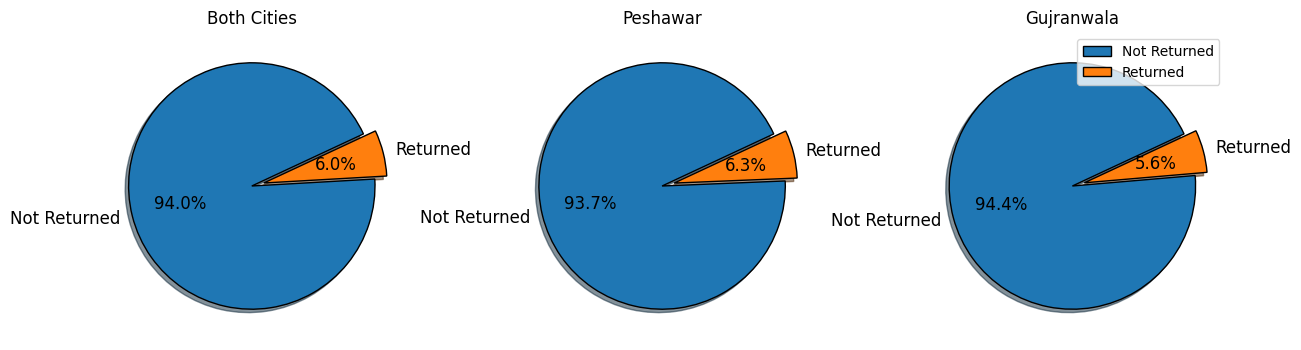

In [12]:
plt.figure(figsize=(15, 4))
i=0
ds = [all_data, data_P, data_G]
titles = ['Both Cities', 'Peshawar', 'Gujranwala']
for data, i , title in zip(ds, range(len(ds)), titles):
    plt.subplot(1, 3,i+1)
    plt.pie(data, labels=data.index.tolist(), autopct='%1.1f%%', explode=(0, 0.1), shadow=True, startangle=25, textprops={'fontsize': 12}, wedgeprops={'edgecolor': 'black', 'linewidth': 1})
    plt.title(title)
plt.legend(loc='upper right')
plt.show()

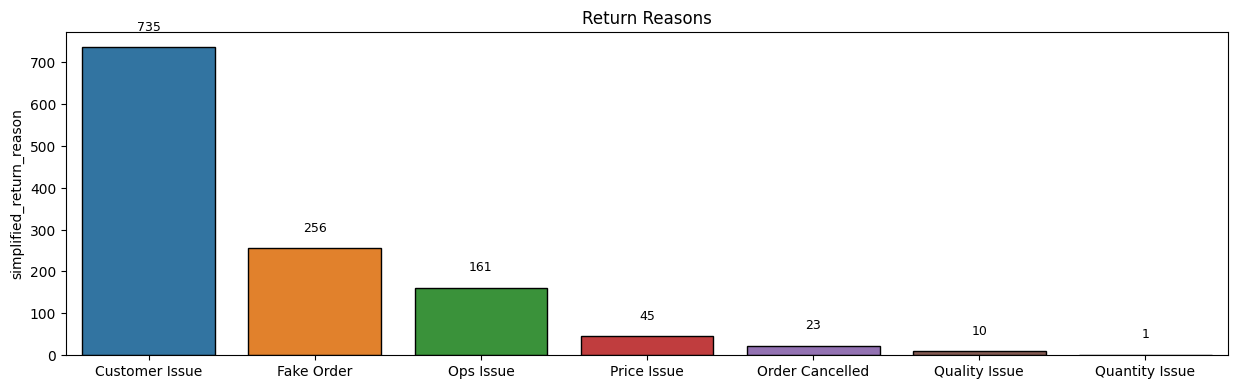

In [13]:
plt.figure(figsize=(15, 4.2))
ax = sns.barplot(data = df, y = df['simplified_return_reason'].value_counts(), x = df['simplified_return_reason'].value_counts().index.tolist(), linewidth=1, edgecolor='black')
for val, container in zip(df['simplified_return_reason'], ax.containers):
    ax.bar_label(container, fontsize=9, padding=10)
plt.title('Return Reasons')
plt.show()

In [14]:
df.select_dtypes(include=['int64']).columns

Index(['amount_per_unit', 'gross_gmv', 'item_discount', 'net_gmv', 'gross_nmv',
       'adjustment_amount', 'ordered_quantity', 'delivered_quantity',
       'returned_quantity', 'out_of_stock_quantity'],
      dtype='object')

### Explain losses occuring due to returns

In [15]:
data_P = df[df['city'] == 'Peshawar']
data_G = df[df['city'] == 'Gujranwala']

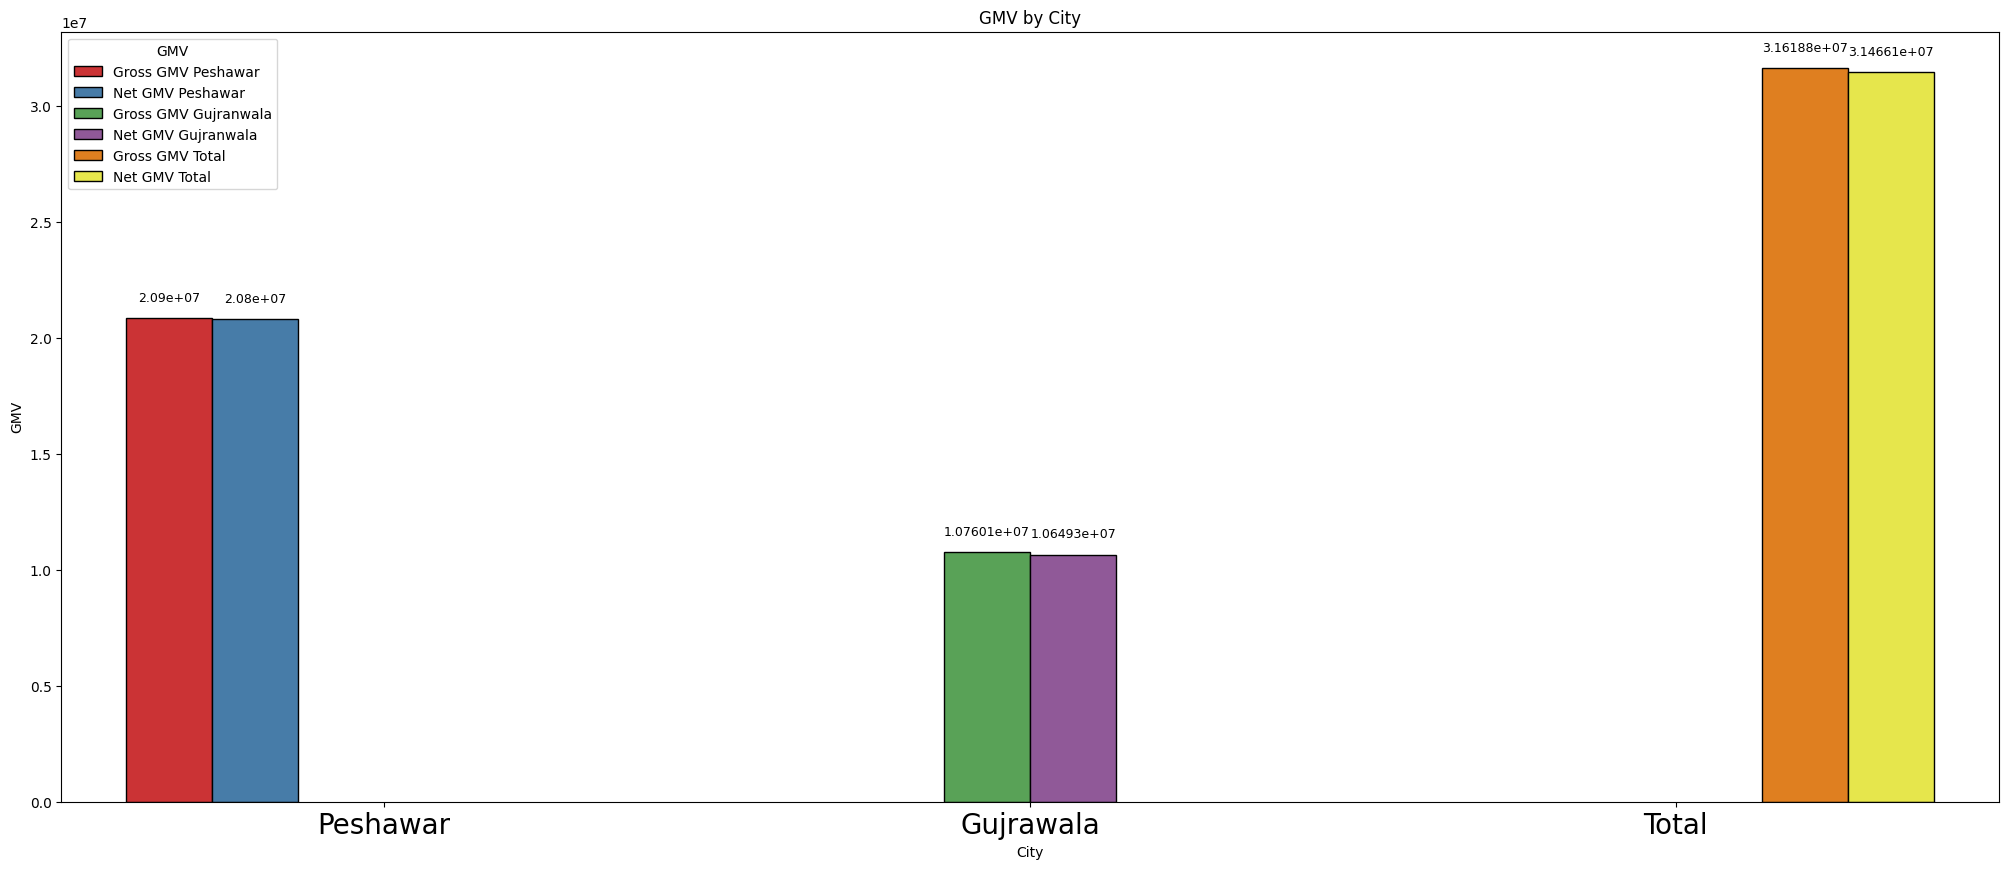

In [16]:
plt.figure(figsize=(25, 10))
temp_df = pd.DataFrame({
    'GMV': ['Gross GMV Peshawar', 'Net GMV Peshawar', 'Gross GMV Gujranwala', 'Net GMV Gujranwala', 'Gross GMV Total', 'Net GMV Total'],
    'Value': [
        data_P['gross_gmv'].sum(),
        data_P['net_gmv'].sum(),
        data_G['gross_gmv'].sum(),
        data_G['net_gmv'].sum(),
        data_P['gross_gmv'].sum() + data_G['gross_gmv'].sum(),
        data_P['net_gmv'].sum() + data_G['net_gmv'].sum()
    ],
    'Category': ['Peshawar', 'Peshawar', 'Gujrawala', 'Gujrawala', 'Total', 'Total']
})

label_format = "%.2e"
ax = sns.barplot(x='Category', y='Value', hue='GMV', data=temp_df, linewidth=1, edgecolor='black', palette='Set1')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20, rotation=0, ha='center')

for val, container in zip(temp_df['Value'], ax.containers):
    ax.bar_label(container, labels=[label_format % val], fontsize=9, padding=10)
plt.xlabel('City')
plt.ylabel('GMV')
plt.title('GMV by City')
plt.show()


In [17]:
temp_df

,GMV,Value,Category
0,Gross GMV Peshawar,20858650,Peshawar
1,Net GMV Peshawar,20816759,Peshawar
2,Gross GMV Gujranwala,10760106,Gujrawala
3,Net GMV Gujranwala,10649313,Gujrawala
4,Gross GMV Total,31618756,Total
5,Net GMV Total,31466072,Total


#### Why returns?

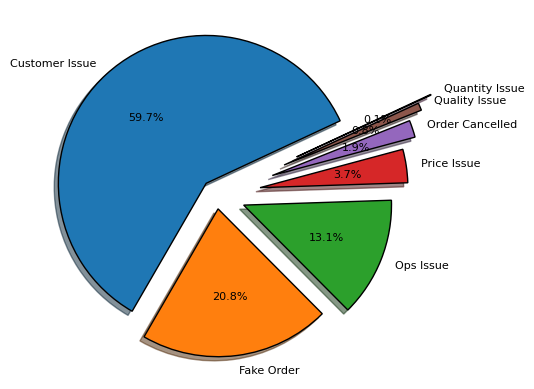

In [18]:
plt.pie(df['simplified_return_reason'].value_counts(), labels=df['simplified_return_reason'].value_counts().index.tolist(), autopct='%1.1f%%', explode=(0.1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6), shadow=True, startangle=25, textprops={'fontsize': 8}, wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.show()

In [19]:
# Most returned items
df[df['Ret/Not Ret'] == 'Returned']['item_name'].value_counts().head(10).reset_index().rename(columns={'index': 'Item Name', 'item_name': 'Count'})

,Item Name,Count
0,Capstan by Pall Mall (10 packs),44
1,Dettol Soap 85 gm Original,30
2,Sting Red Berry 500 ml Pack x 12,29
3,Dettol Soap 85 gm Cool,27
4,Gold Leaf Full Filter (10 Packs),21
5,Slice Mango Juice 200 ml Carton (24 pcs),19
6,Nestle Fruita Vitals Chaunsa 200 ml Carton (24...,18
7,Tapal Tezdum 8 gm Sachet x 10,16
8,Prince Chocolate Sandwich Biscuits Rs. 10 Box ...,16
9,All Max Tea Whitener 223 ml Carton (27 pcs),16


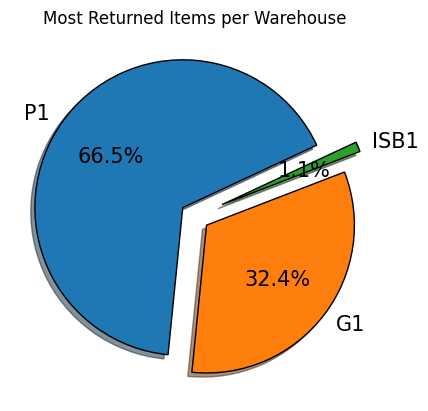

In [20]:
# Most Returned Items per Warehouse
plt.pie(df[df['Ret/Not Ret'] == 'Returned']['delivery_warehouse'].value_counts(), labels=df[df['Ret/Not Ret'] == 'Returned']['delivery_warehouse'].value_counts().index.tolist(), autopct='%1.1f%%', explode=(0.1, 0.1, 0.2), shadow=True, startangle=25, textprops={'fontsize': 15}, wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.title('Most Returned Items per Warehouse')
plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19739 entries, 0 to 19738
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   dispatch_date             19739 non-null  object 
 1   order_date                19739 non-null  object 
 2   city                      19739 non-null  object 
 3   town                      19739 non-null  object 
 4   uc                        19739 non-null  object 
 5   delivery_warehouse        19739 non-null  object 
 6   delivered_by              19739 non-null  object 
 7   store_id                  19739 non-null  object 
 8   shaheen_id                19739 non-null  object 
 9   tour_number               19739 non-null  object 
 10  delivery_type             19739 non-null  object 
 11  order_channel             19739 non-null  object 
 12  item_name                 19739 non-null  object 
 13  weight                    19739 non-null  float64
 14  amount

In [22]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
object_cols = df.select_dtypes(include=['object']).columns.tolist()

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Ret/Not Ret'] = le.fit_transform(df['Ret/Not Ret'])

In [25]:
import category_encoders as ce

enc = ce.TargetEncoder(cols=object_cols)

# Fit the target encoder on the dataset
df_encoded = enc.fit_transform(df, df['Ret/Not Ret'])

In [26]:
cols = df_encoded.columns.tolist()

for col in cols:
    df[col] = df_encoded[col]

In [27]:
df.head()

,dispatch_date,order_date,city,town,uc,delivery_warehouse,delivered_by,store_id,shaheen_id,tour_number,...,net_gmv,gross_nmv,adjustment_amount,ordered_quantity,delivered_quantity,returned_quantity,out_of_stock_quantity,adjustment_reason,simplified_return_reason,Ret/Not Ret
0,0.074455,0.093966,0.062915,0.326203,0.326203,0.326203,0.060454,0.326203,0.168005,0.168005,...,0.003030,0.000000,0.0,0.002203,0.000000,0.02,0.0,0.060434,0.948299,1.0
1,0.074455,0.061728,0.062915,0.326203,0.326203,0.326203,0.060454,0.326203,0.168005,0.168005,...,0.001861,0.001751,0.0,0.004405,0.006667,0.00,0.0,0.060434,0.002431,0.0
2,0.074455,0.061728,0.062915,0.326203,0.326203,0.326203,0.060454,0.326203,0.168005,0.168005,...,0.001439,0.001358,0.0,0.004405,0.006667,0.00,0.0,0.060434,0.002431,0.0
3,0.074455,0.093966,0.062915,0.326203,0.326203,0.326203,0.060454,0.326203,0.168005,0.168005,...,0.002488,0.000000,0.0,0.006608,0.000000,0.04,0.0,0.060434,0.948299,1.0
4,0.074455,0.137604,0.062915,0.326203,0.326203,0.326203,0.060454,0.326203,0.168005,0.168005,...,0.001191,0.001151,0.0,0.015419,0.017778,0.00,0.0,0.060434,0.002431,0.0


In [28]:
X = df.drop(columns=['Ret/Not Ret'])
y = df['Ret/Not Ret']

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

pca_X = pca.fit_transform(X)

print('Explained variance:', pca.explained_variance_ratio_)


Explained variance: [0.52685477 0.23443756 0.10208891 0.03341402 0.03213372 0.02175144
 0.01823909 0.00866175 0.00513845 0.00468531]


In [30]:
df_loadings = pd.DataFrame(pca.components_,columns=X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10'])


<Axes: >

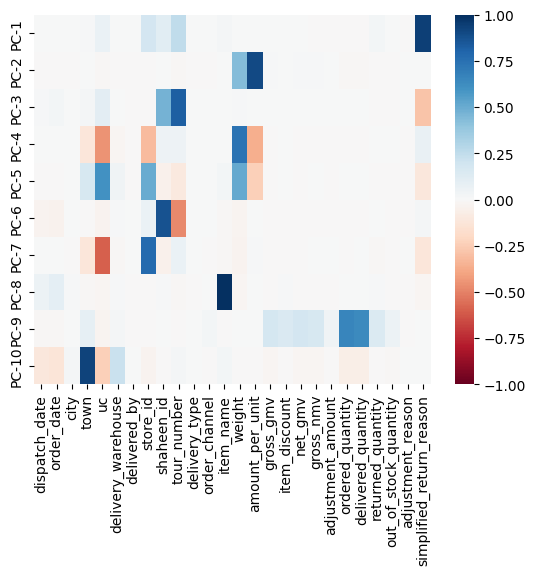

In [34]:
sns.heatmap(df_loadings, cmap='RdBu', annot=False, vmin=-1, vmax=1)

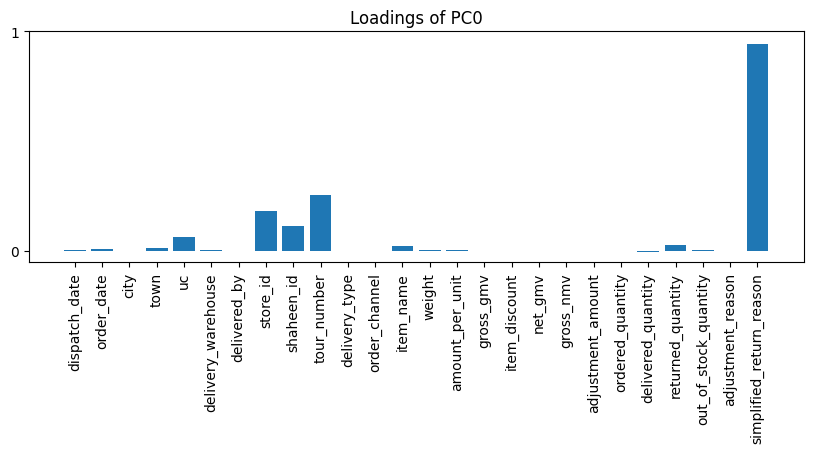

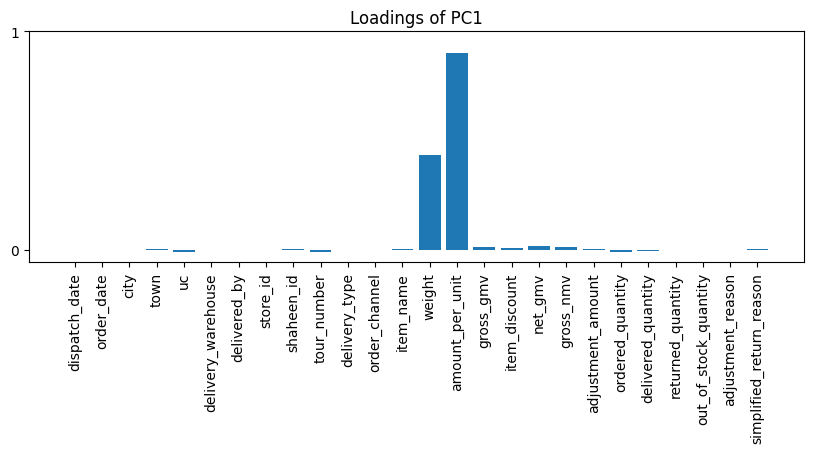

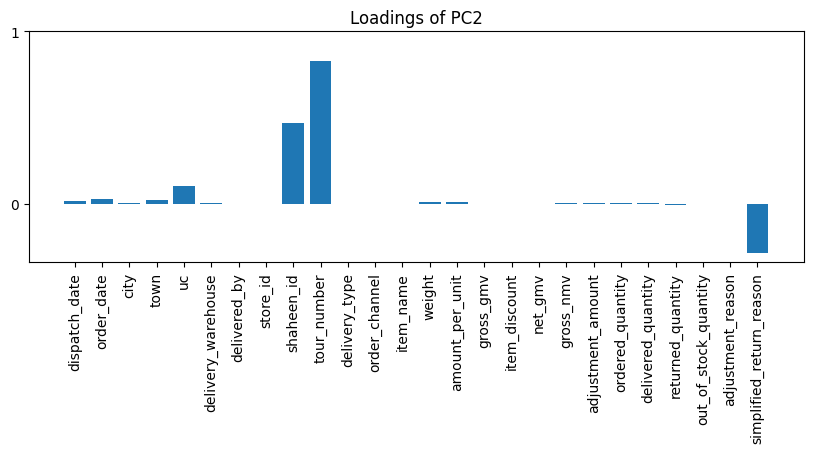

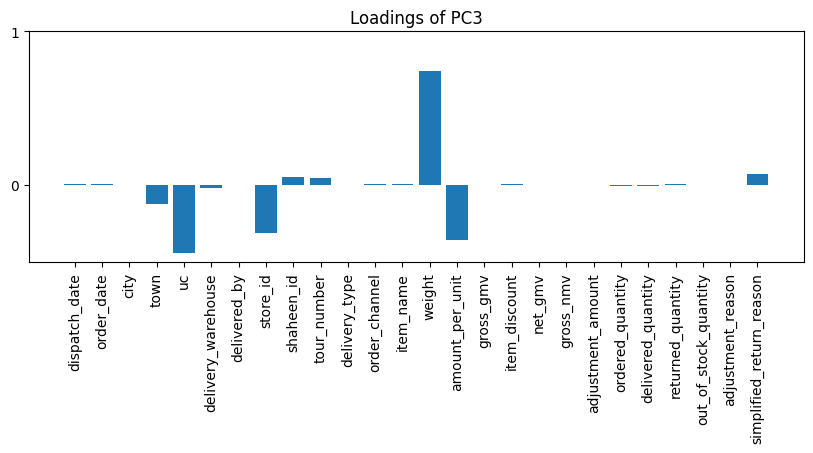

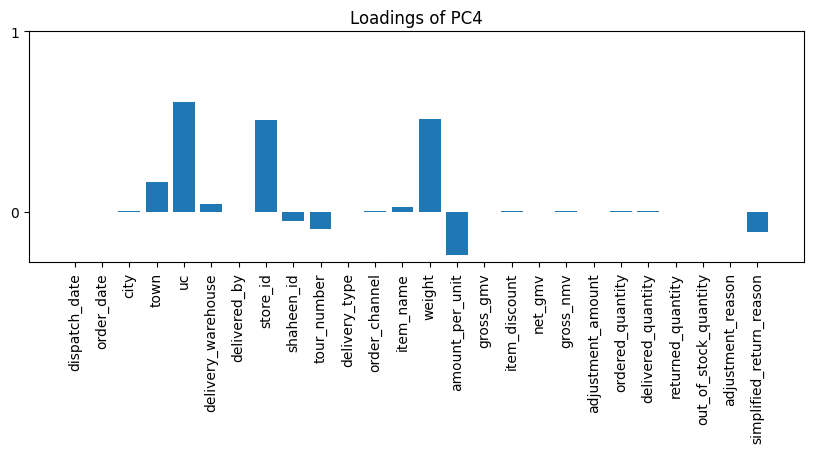

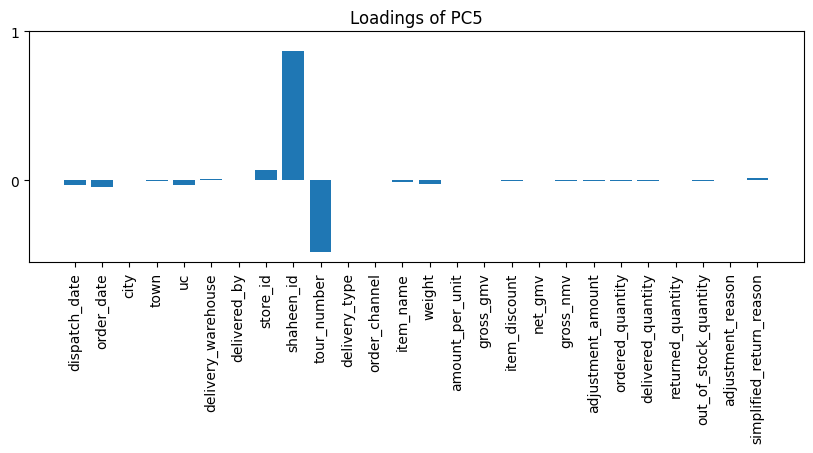

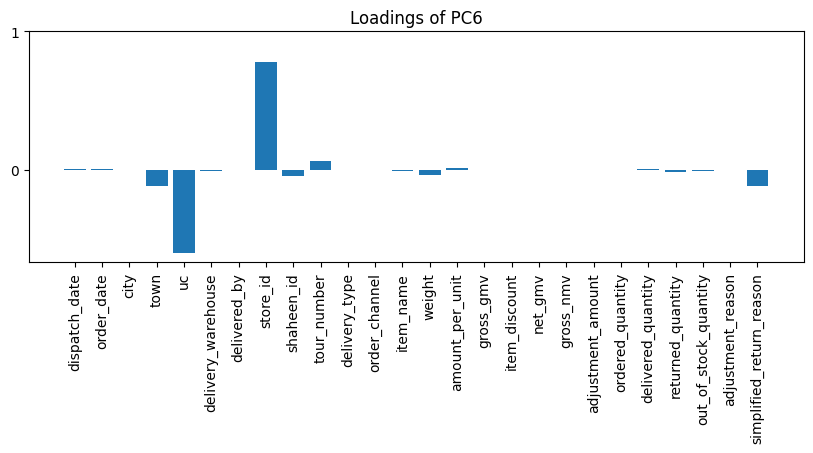

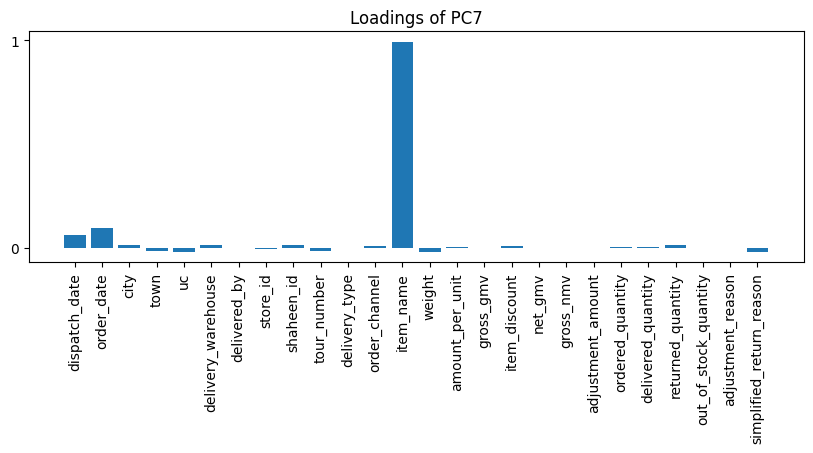

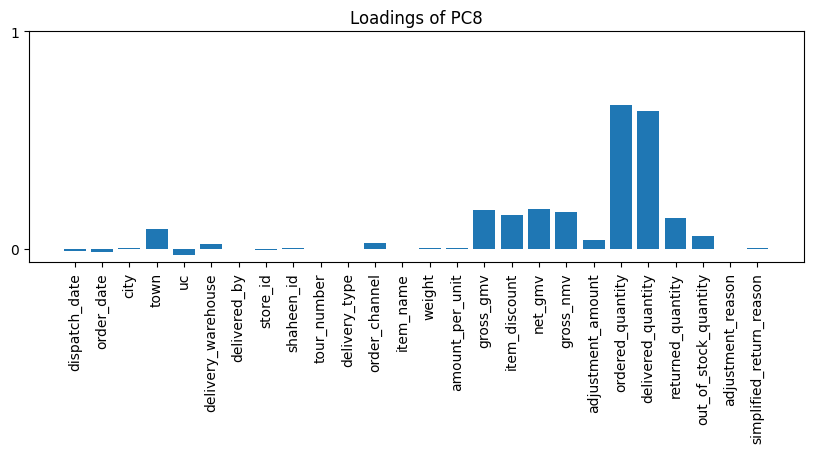

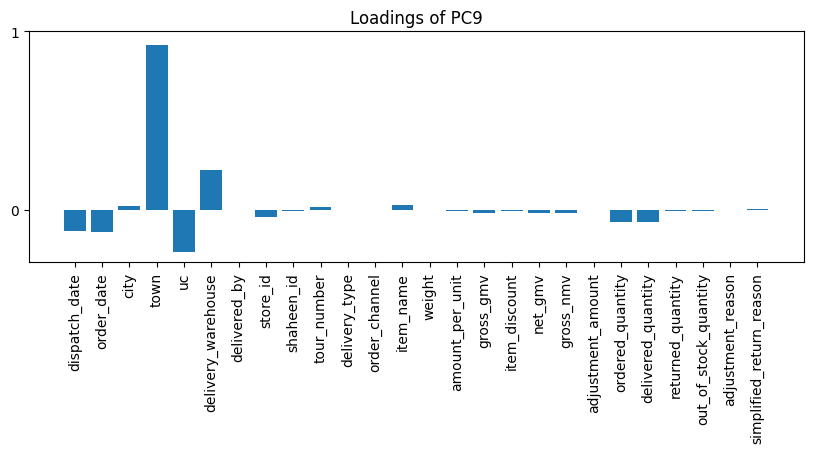

In [40]:
for i in range(len(df_loadings)):
    plt.figure(figsize=(10, 3))
    plt.bar(range(len(X.columns)), df_loadings.iloc[i])
    plt.xticks(range(len(X.columns)), X.columns, rotation=90)
    plt.yticks(range(0, 2))
    plt.title("Loadings of PC"+ str(i))
    plt.show()


In [ ]:
from sklearn.cluster import KMeans


wcss = []

In [ ]:
X= df.iloc[:, :27].values

In [ ]:
for i in range(1, 27):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

c:\Users\Dell 9010\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Dell 9010\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Dell 9010\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Dell 9010\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for n_cluster in range(2, 28):
    silhouette_scores.append(silhouette_score(X, KMeans(n_clusters=n_cluster).fit_predict(X)))
    

c:\Users\Dell 9010\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Dell 9010\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Dell 9010\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Dell 9010\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4

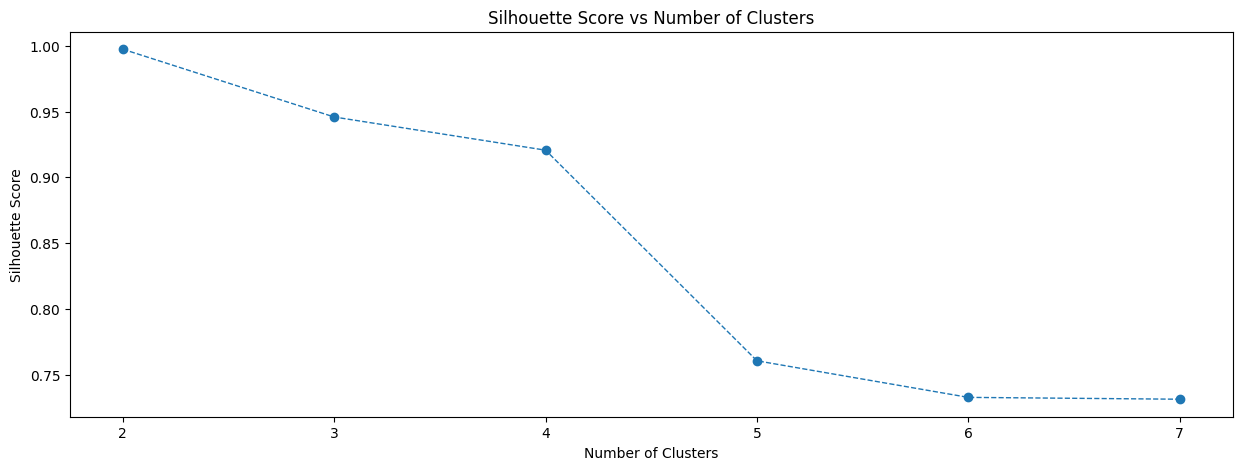

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(range(2, 8), silhouette_scores, linewidth=1, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

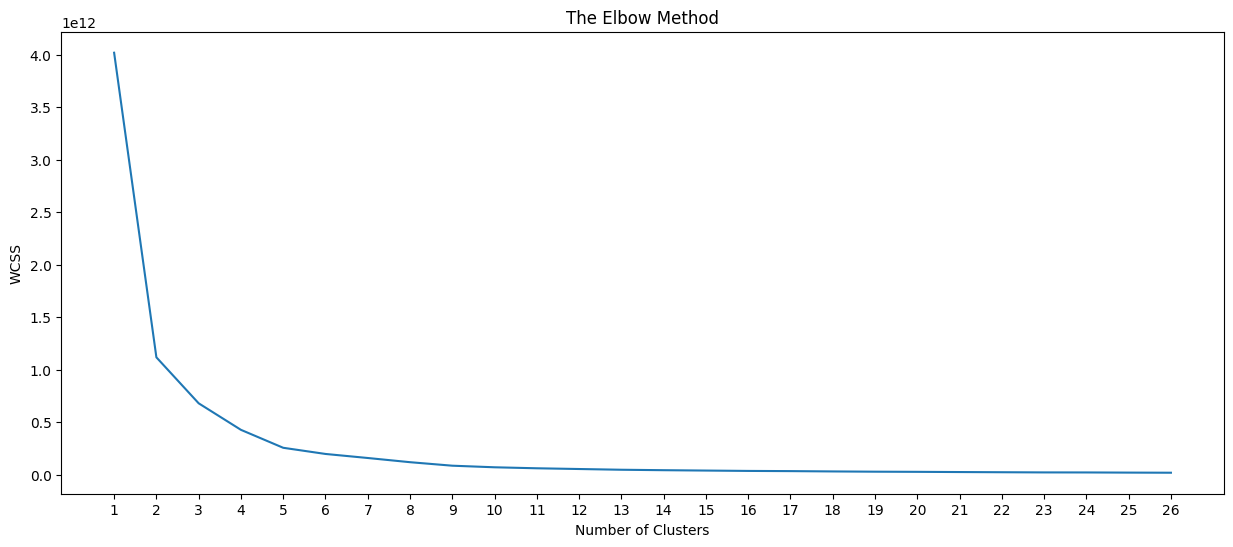

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(range(1, 27), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 27))
plt.show()